# **Tarea 2**
**Valeria Ferreira Nocua**


Support each piece of code with a thorough explanation of its methods, techniques, functions, and tricks. Reference your search source(papers, books, tutorials, websites, etc.). Add any necessary bibliographical references or links. 

In [196]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Definición de funciones, clases y métodos


Clase punto

In [197]:
#clase punto que es para un vértice, tiene x, y, y su nombre
class Point:
  #constructor
  def __init__(self, x, y, name):
    self.x = x
    self.y = y
    self.name = name
    self.type = None 
  #metodos de la clase
  def __repr__(self):
    return(f"({self.x}, {self.y})")

  def __str__(self):
    return(f"({self.x}, {self.y})")

Función para graficar polígonos

In [198]:
#graficar poligonooos
def polygon(points):
  xcoor = []
  ycoor = []
  for i in points:
    plt.scatter(i.x, i.y, marker = 'o', color = 'darkviolet')
    xcoor.append(i.x)
    ycoor.append(i.y)
    plt.annotate(i.name, xy=[i.x, i.y])
  xcoor.append(points[0].x)
  ycoor.append(points[0].y)
  plt.plot(xcoor, ycoor,color = 'hotpink')
  
  
  plt.show()



Función que pasa una lista de puntos, a una lista de elementos de la clase punto 

In [199]:
def toPoint(P):
  #pasa una lista de puntos a una lista de elementos de la clase puntos
  points = []
  for i in range(len(P)):
    points.append(Point(P[i][0], P[i][1], 'p' + str(i+1).zfill(2)))
  
  return points

Producto cruz

In [200]:
def crossProd(p0, p1, p2): #origen comun, p1 , p2
  return((p1.x - p0.x)*(p2.y- p0.y)- (p2.x - p0.x)*(p1.y-p0.y))




Giros

In [201]:

def turn(p0, p1, p2):
  if crossProd(p0,p1,p2)>0:
    return True #izquierda
    #print(f"En {p1} se hace un giro en sentido anti-horario")
  elif crossProd(p0,p1,p2)<0:
    return False #derecha
    #print(f"En {p1} se hace un giro en sentido horario")
  else:
    return False #no hay giro
    #print(f"En {p1} no se hace giro")

Clase para una semi arista

In [202]:
#semi arista
class HalfEdge:
  def __init__(self, startp, endp):
    self.startp = startp
    self.endp = endp
    self.twin = None
    self.next = None
    self.prev = None
    self.face = None
    self.name = f'e{startp.name[1]}{startp.name[2]}-1'

  def __repr__(self):
    #return(f"(inicio: {self.startp}, final: {self.endp})")
    return (f'{self.name}')

Clase para definir una cara

In [203]:
class Face:
    def __init__(self, face, innerC, outerC):
        self.face = face
        self.innerC = innerC
        self.outerC = outerC
        

Puntos dados para el ejercicio:

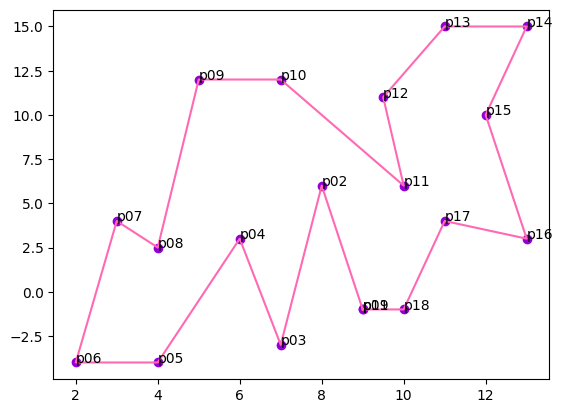

In [204]:
p = [(9.0,-1.0), (8.0,6.0), (7.0,-3.0), (6.0,3.0), (4.0,-4.0), (2.0,-4.0),
          (3.0,4.0), (4.0,2.5), (5.0,12.0), (7.0,12.0), (10.0,6.0), (9.5,11.0),
          (11.0,15.0), (13.0,15.0), (12.0,10.0), (13.0,3.0), (11.0,4.0), 
          (10.0,-1.0), (9.0, -1.0)]



points = toPoint(p)


polygon(points)


### **1.** Write down a code able to identify if the points are ordered in a counterclockwise order. The code should inverse the order of points so that they are counterclockwise ordered if they are in the opposite order. **Explain and implement your procedure**.

In [205]:
def checkorder(points):
    newp = []
    cross_sum = 0
    n = len(points)
    for i in range(n):
        cross = crossProd(points[i], points[(i+1)%n], points[(i+2)%n])
        cross_sum += cross
    
    if cross_sum > 0:
        print('the points are in a counterclockwise order')
        newp = points
        return newp
    else:
        print('the points are in a clockwise order, changing the order ....')
        newp = points.reverse()
        return newp

In [206]:
checkorder(points)

the points are in a clockwise order, changing the order ....


### **2.** Write down a code able to read the ordered points and create a doubly-connected edge list for the simple polygon. **Print the doubly-connected edge list related to the simple polygon**.

Para la lista de aristas:

In [207]:
#Twin de la semi arista
def twin(x):
  if x.name[4] == "1":
    return str(x.name[0]+x.name[1]+x.name[2] + x.name[3]+"2")
  else:
    return str(x.name[0] + x.name[1]  + x.name[2] + "1")
  
def AssignEdgesValues (points):
  #Dados los puntos, crea las semiaristas y asigna los valores.
  edges = [] #lista para las aristas principales
  twins = [] #lista para los twins de las aristas originales
  #creamos las semiaristas
  for i in range(len(points)-1):
        e = HalfEdge(points[i], points[i+1])
        edges.append(e)
        
        t = HalfEdge(points[i+1], points[i])
        t.name = twin(e)
        twins.append(t)
  #asignamos los valores
  for i in range(len(edges)-1):
    e = edges[i]
    e.next = edges[i+1]
    e.prev = edges[i-1]
    e.twin = twins[i]
    e.face = 'f1'
  
  #asignamos el valor de la última arista
  e = edges[-1]
  e.next = edges[0]
  e.prev = edges[-2]
  e.twin = twins[-1]
  e.face = 'f1'
  
  #asignamos los valores para los twins
  for i in range(len(twins)-1):
    t = twins[i]
    t.next = twins[i-1]
    t.prev = twins[i+1] 
    t.twin = edges[i]
    t.face = 'f2'
    
  #asignamos el valor del último twin
  t = twins[-1]
  t.next = twins[-2]
  t.prev = twins[0]
  t.twin = edges[-1]
  t.face = 'f2'


  #retorna una lista con las aristas principales y sus twins
  return edges + twins


#imprime un df de la lista de aristas doble conectadas

def ListOfedges(edges):
    names, origin, twins, next, prev, face = [],[],[],[],[], []
    
    for e in edges:
      names.append(e)
      origin.append(e.startp)
      twins.append(e.twin)
      next.append(e.next)
      prev.append(e.prev)
      face.append(e.face)

    df = {'Arista': names, 'Origen': origin, 'Twin': twins, 'Next': next, 
          'Previous': prev, 'CaraIn': face}
    dcel = pd.DataFrame(df)

    return dcel

Para la lista de los nodos:


In [208]:
#definimos un dataframe para visualizar la lista de nodos
def nodes (points):
    nodes = []
    for i in range(len(points)-1):
        nodes.append(points[i])
    return nodes

def ListOfNodes(points, edges):
    ver, coor, inEdge = [], [], []
    for p in range(len(points)):
        ver.append(points[p].name)
        c = f'({points[p].x},{points[p].y})'
        coor.append(c)
        for e in edges:
            if points[p].name[1:] == e.name[1:3] and e.name[4] == '1':
                inEdge.append(e.name)
    

    df = {'Vertice': ver, 'Coordenada': coor, 'AristaIn': inEdge}
    nodesList = pd.DataFrame(df)
    
    return nodesList


Para la lista de las caras:

In [209]:
def listfaces (edges):
    
    f1 = Face('f1', None, edges[0])
    f2 = Face('f2', edges[-1], None)
    faces = [f1, f2]
    return faces

#definimos un dataframe para visualizar la lista de caras
def ListOfFaces(facesList):   
    
    faces, outer, inner = [], [], []

    for f in facesList:
        faces.append(f.face)
        outer.append(f.outerC)
        inner.append(f.innerC)
    
    df = {'Cara': faces, 'Comp. Ext': outer, 'Comp. Int': inner}
    dfFaces  = pd.DataFrame(df)
    return dfFaces
            
    


Creamos las listas de aristas y caras:

In [210]:
edges = AssignEdgesValues(points)
faces = listfaces(edges)
nodes = nodes(points)

Ahora, visualizamos en un dataframe la lista de aristas

In [211]:

ListOfedges(edges)


,Arista,Origen,Twin,Next,Previous,CaraIn
0,e19-1,"(9.0, -1.0)",e19-2,e18-1,e02-1,f1
1,e18-1,"(10.0, -1.0)",e18-2,e17-1,e19-1,f1
2,e17-1,"(11.0, 4.0)",e17-2,e16-1,e18-1,f1
3,e16-1,"(13.0, 3.0)",e16-2,e15-1,e17-1,f1
4,e15-1,"(12.0, 10.0)",e15-2,e14-1,e16-1,f1
5,e14-1,"(13.0, 15.0)",e14-2,e13-1,e15-1,f1
6,e13-1,"(11.0, 15.0)",e13-2,e12-1,e14-1,f1
7,e12-1,"(9.5, 11.0)",e12-2,e11-1,e13-1,f1
8,e11-1,"(10.0, 6.0)",e11-2,e10-1,e12-1,f1
9,e10-1,"(7.0, 12.0)",e10-2,e09-1,e11-1,f1


Visualizamos la lista de los vértices

In [212]:
ListOfNodes(nodes, edges)



,Vertice,Coordenada,AristaIn
0,p19,"(9.0,-1.0)",e19-1
1,p18,"(10.0,-1.0)",e18-1
2,p17,"(11.0,4.0)",e17-1
3,p16,"(13.0,3.0)",e16-1
4,p15,"(12.0,10.0)",e15-1
5,p14,"(13.0,15.0)",e14-1
6,p13,"(11.0,15.0)",e13-1
7,p12,"(9.5,11.0)",e12-1
8,p11,"(10.0,6.0)",e11-1
9,p10,"(7.0,12.0)",e10-1


Finalmente, visualizamos la lista de caras:

In [213]:
ListOfFaces(faces)


,Cara,Comp. Ext,Comp. Int
0,f1,e19-1,None
1,f2,None,e02-2


Añadimos la lista de aristas, vértices y caras a una lista.

In [214]:
dcel = [edges, points, faces]


In [215]:
#funcion para identificar caras nuevas
def idFaces(edges):
    edges_copy = edges.copy()
    i = 1
    while edges_copy:

        edge_i = edges_copy[0]
        edges_copy.pop(0)
        
        edge_n = edge_i.next
        edge_n.face = f'f{i}'
        #cicle = []
        while edge_n != edge_i:
            edge_n.face = f'f{i}'
            edges_copy.pop(edges_copy.index(edge_n))
            edge_n = edge_n.next
        i += 1

### **3.** Implement an algorithm, able to split the given polygon into y-monotone polygons. Give your answer in terms of doubly-connected edge lists. **Plot the split into y-monotone polygon**

Iniciamos etiquetando los vértices:

In [216]:
def SortBy(p): #ordena los puntos en el orden mostrado en clase
  sorted = []
  pointsc = p.copy()
  #print(pointsc)
  while len(pointsc):
    pi = pointsc[0]
    for q in pointsc:
      if (pi.y > q.y) or (pi.y == q.y and pi.x < q.x):
        pi = pi
      else:
        pi = q
    sorted.append(pi)
    pointsc.pop(pointsc.index(pi))
  return sorted
  #print(sorted)

def SetType(sorted, edges): #clasifica los vertices segun su tipo
  for point in sorted:
    for edge in edges[:len(edges)//2]:
      #index = edges.index(edge)-1
      if point == edge.startp and ((point.y > edge.endp.y and point.y > edge.prev.startp.y) 
      or (point.y == edge.endp.y and point.y == edge.prev.startp.y and point.x < edge.endp.x and point.x < edge.prev.startp.x)):

        if turn(edge.startp, edge.endp, edge.prev.startp):
          point.type = "start"

        else:
          point.type = "split"

      elif point == edge.startp and point.y < edge.endp.y and point.y < edge.prev.startp.y:
        if turn(edge.startp, edge.endp, edge.prev.startp):
          point.type = "end"

        else:
          point.type = "merge"


  for point in sorted:
    if point.type == None:
      point.type = "normi"
  
    print(point, point.type)


Definimos una función para graficar el polígono, según el tipo

In [217]:
def polygon_byType(points, edges):
  #grafica el poligono
  sorted = SortBy(points)
  SetType(sorted, edges)

  vcolor = 'darkviolet'
  lcolor = 'hotpink'

  xcoor = []
  ycoor = []
  for i in points:
    if i.type =="start":
      plt.scatter(i.x, i.y, marker = 's', facecolor = 'none', edgecolor = vcolor, s=80)
    elif i.type == "end":
      plt.scatter(i.x, i.y, marker = 's', color = vcolor, s=80)
    elif i.type == "merge":
      plt.scatter(i.x, i.y, marker = 'v', color = vcolor, s=80)
    elif i.type == "split":
      plt.scatter(i.x, i.y, marker = '^', color = vcolor, s=80)
    else:
      plt.scatter(i.x, i.y, marker = 'o', color = vcolor)
    xcoor.append(i.x)
    ycoor.append(i.y)
  xcoor.append(points[0].x)
  ycoor.append(points[0].y)
  plt.plot(xcoor, ycoor,color = lcolor)
  plt.title("Polygon with classified types of vertices")
  plt.show()

(11.0, 15.0) normi
(13.0, 15.0) normi
(5.0, 12.0) normi
(7.0, 12.0) normi
(9.5, 11.0) normi
(12.0, 10.0) normi
(8.0, 6.0) split
(10.0, 6.0) merge
(3.0, 4.0) start
(11.0, 4.0) split
(6.0, 3.0) split
(13.0, 3.0) end
(4.0, 2.5) merge
(9.0, -1.0) normi
(10.0, -1.0) normi
(7.0, -3.0) end
(2.0, -4.0) normi
(4.0, -4.0) normi


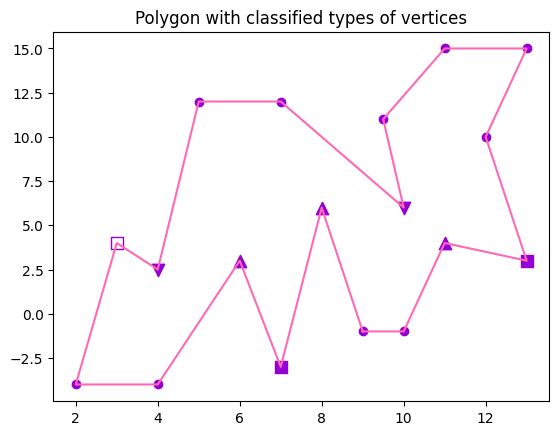

In [218]:
polygon_byType(nodes, edges)

-------------------------------

> prueba

In [219]:
pointsBook = [(3.1,2.9),(2.95,2.8),(2.9,4.5),(2.7,4),(2.5,4.5),(2.3,3.9),
          (2.4,3.2),(2.3,2.5),(2.2,3.1),(2.1,1.5),(2.3,0.7),(2.5,1.1),(2.8,0.5),
          (2.7,2),(3,1.7)]

pointsb = toPoint(pointsBook)


In [220]:
checkorder(pointsb)

the points are in a counterclockwise order


[(3.1, 2.9),
 (2.95, 2.8),
 (2.9, 4.5),
 (2.7, 4),
 (2.5, 4.5),
 (2.3, 3.9),
 (2.4, 3.2),
 (2.3, 2.5),
 (2.2, 3.1),
 (2.1, 1.5),
 (2.3, 0.7),
 (2.5, 1.1),
 (2.8, 0.5),
 (2.7, 2),
 (3, 1.7)]

(2.5, 4.5) start
(2.9, 4.5) start
(2.7, 4) merge
(2.3, 3.9) normi
(2.4, 3.2) normi
(2.2, 3.1) start
(3.1, 2.9) start
(2.95, 2.8) merge
(2.3, 2.5) merge
(2.7, 2) split
(3, 1.7) normi
(2.1, 1.5) normi
(2.5, 1.1) split
(2.3, 0.7) end
(2.8, 0.5) end


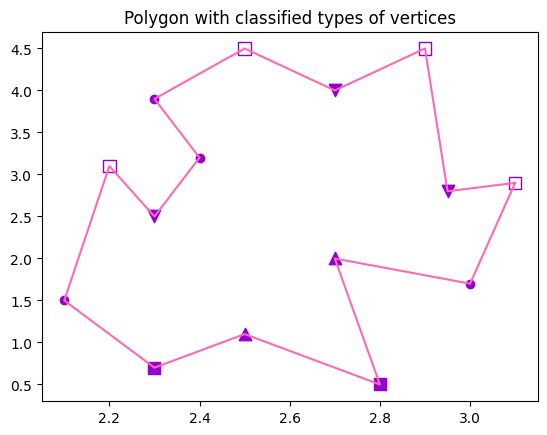

In [221]:
edgesb = AssignEdgesValues(pointsb)
facesb = listfaces(edgesb)
polygon_byType(pointsb, edgesb)

4. Implement the triangulation procedure and apply it to each y-monotone polygons. Give your answer in terms of a doubly-connected edge list. **Plot the triangulated polygon**

5. Find the vertices from which a minimum number of cameras could be used to guard the entire polygon. **Identify and plot the places where the cameras should be localized**